In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from plotnine import *

# Load the datasets
missing_tooth = pd.read_csv('missing_tooth.csv')
tooth_chipped = pd.read_csv('tooth_chipped_fault.csv')
surface_fault = pd.read_csv('surface_fault.csv')
no_fault = pd.read_csv('no_fault.csv')
root_crack = pd.read_csv('root_crack.csv')
eccentricity = pd.read_csv('eccentricity.csv')

In [2]:
no_fault.speedSet.value_counts()

speedSet
8.332031     50000
25.000000    50000
40.000000    50000
Name: count, dtype: int64

In [3]:
no_fault.load_value.value_counts()


load_value
0     75000
80    75000
Name: count, dtype: int64

In [4]:
missing_tooth['state'] = 'missing_tooth'
tooth_chipped['state'] = 'tooth_chipped'
surface_fault['state'] = 'surface_fault'
no_fault['state'] = 'no_fault'
root_crack['state'] = 'root_crack'
eccentricity['state'] = 'eccentricity'

df = pd.concat([
    missing_tooth, 
    tooth_chipped,
    surface_fault,
    no_fault,
    root_crack, 
    eccentricity
])
display(df.info())
#Normalize time_x grouped by state, load_value, speedSet
df['time_x'] = pd.to_datetime(df['time_x'])
df['time_normalized'] = df.groupby(['state', 'load_value', 'speedSet'])['time_x'].transform(lambda x: (x - x.min()).dt.total_seconds())

df['time_normalized']


<class 'pandas.core.frame.DataFrame'>
Index: 900000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sensor1          900000 non-null  float64
 1   sensor2          900000 non-null  float64
 2   time_x           900000 non-null  object 
 3   speedSet         900000 non-null  float64
 4   load_value       900000 non-null  int64  
 5   gear_fault_desc  900000 non-null  object 
 6   state            900000 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.9+ MB


None

0         0.0000
1         0.0002
2         0.0004
3         0.0006
4         0.0008
           ...  
149995    4.9990
149996    4.9992
149997    4.9994
149998    4.9996
149999    4.9998
Name: time_normalized, Length: 900000, dtype: float64

In [5]:
df.drop(columns='time_normalized').describe()

,sensor1,sensor2,time_x,speedSet,load_value
count,900000.000000,900000.000000,900000,900000.000000,900000.000000
mean,2.519877,2.429291,2023-05-03 13:39:41.138789376,24.444010,40.000000
min,2.219428,2.161939,2023-05-02 10:30:01,8.332031,0.000000
25%,2.516895,2.426390,2023-05-02 16:02:08.249949952,8.332031,0.000000
50%,2.520180,2.429839,2023-05-03 13:54:29.499899904,25.000000,40.000000
75%,2.522972,2.432303,2023-05-03 20:28:31.249850112,40.000000,80.000000
max,2.820934,2.709896,2023-05-07 17:11:48.999800,40.000000,80.000000
std,0.011236,0.012001,NaN,12.934378,40.000022


In [6]:
df['time_formatted'] = pd.to_datetime(df.time_x, format="%Y-%m-%d %H:%M:%S.%f")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   sensor1          900000 non-null  float64       
 1   sensor2          900000 non-null  float64       
 2   time_x           900000 non-null  datetime64[ns]
 3   speedSet         900000 non-null  float64       
 4   load_value       900000 non-null  int64         
 5   gear_fault_desc  900000 non-null  object        
 6   state            900000 non-null  object        
 7   time_normalized  900000 non-null  float64       
 8   time_formatted   900000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 68.7+ MB


In [8]:
df.state.value_counts()

state
missing_tooth    150000
tooth_chipped    150000
surface_fault    150000
no_fault         150000
root_crack       150000
eccentricity     150000
Name: count, dtype: int64

In [9]:
df.state.unique()

array(['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault',
       'root_crack', 'eccentricity'], dtype=object)

In [10]:
df['no_fault'] = df.state == 'no_fault'

In [11]:
df.groupby('state')

In [12]:
df.columns

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'state', 'time_normalized', 'time_formatted',
       'no_fault'],
      dtype='object')

In [13]:
df[[
    'speedSet', 
    'load_value',
    'sensor1', 
    'sensor2'
]].describe()

,speedSet,load_value,sensor1,sensor2
count,900000.000000,900000.000000,900000.000000,900000.000000
mean,24.444010,40.000000,2.519877,2.429291
std,12.934378,40.000022,0.011236,0.012001
min,8.332031,0.000000,2.219428,2.161939
25%,8.332031,0.000000,2.516895,2.426390
50%,25.000000,40.000000,2.520180,2.429839
75%,40.000000,80.000000,2.522972,2.432303
max,40.000000,80.000000,2.820934,2.709896


In [14]:
df.groupby(['speedSet', 'load_value', 'state']).sensor1.max()

speedSet   load_value  state        
8.332031   0           eccentricity     2.526914
                       missing_tooth    2.543340
                       no_fault         2.528393
                       root_crack       2.524615
                       surface_fault    2.575698
                       tooth_chipped    2.525436
           80          eccentricity     2.529542
                       missing_tooth    2.529871
                       no_fault         2.530364
                       root_crack       2.530035
                       surface_fault    2.580626
                       tooth_chipped    2.528721
25.000000  0           eccentricity     2.538576
                       missing_tooth    2.573399
                       no_fault         2.540383
                       root_crack       2.550403
                       surface_fault    2.820934
                       tooth_chipped    2.534963
           80          eccentricity     2.550403
                       missing_t

In [15]:
df.groupby(['speedSet', 'load_value', 'state']).sensor2.max()

speedSet   load_value  state        
8.332031   0           eccentricity     2.435259
                       missing_tooth    2.459734
                       no_fault         2.435259
                       root_crack       2.434274
                       surface_fault    2.466140
                       tooth_chipped    2.435259
           80          eccentricity     2.439366
                       missing_tooth    2.453163
                       no_fault         2.439202
                       root_crack       2.435588
                       surface_fault    2.455463
                       tooth_chipped    2.439530
25.000000  0           eccentricity     2.450042
                       missing_tooth    2.496691
                       no_fault         2.446922
                       root_crack       2.452178
                       surface_fault    2.538905
                       tooth_chipped    2.452835
           80          eccentricity     2.459898
                       missing_t

In [16]:
df.groupby('state').speedSet.describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
eccentricity,150000.0,24.44401,12.934413,8.332031,8.332031,25.0,40.0,40.0
missing_tooth,150000.0,24.44401,12.934413,8.332031,8.332031,25.0,40.0,40.0
no_fault,150000.0,24.44401,12.934413,8.332031,8.332031,25.0,40.0,40.0
root_crack,150000.0,24.44401,12.934413,8.332031,8.332031,25.0,40.0,40.0
surface_fault,150000.0,24.44401,12.934413,8.332031,8.332031,25.0,40.0,40.0
tooth_chipped,150000.0,24.44401,12.934413,8.332031,8.332031,25.0,40.0,40.0


In [17]:
df.groupby('state').load_value.describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
eccentricity,150000.0,40.0,40.000133,0.0,0.0,40.0,80.0,80.0
missing_tooth,150000.0,40.0,40.000133,0.0,0.0,40.0,80.0,80.0
no_fault,150000.0,40.0,40.000133,0.0,0.0,40.0,80.0,80.0
root_crack,150000.0,40.0,40.000133,0.0,0.0,40.0,80.0,80.0
surface_fault,150000.0,40.0,40.000133,0.0,0.0,40.0,80.0,80.0
tooth_chipped,150000.0,40.0,40.000133,0.0,0.0,40.0,80.0,80.0


In [18]:
#plot 

In [19]:
df['sensor1_max_exp'] = df.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().max())
df['sensor1_min_exp'] = df.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().min())

df['sensor2_max_exp'] = df.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().max())
df['sensor2_min_exp'] = df.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().min())

df['sensor1_mean_exp'] = df.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().mean())
df['sensor2_mean_exp'] = df.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().mean())

df['sensor1_std_exp'] = df.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().std())
df['sensor2_std_exp'] = df.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().std())

In [20]:
speedload_8_0 = df[df.state.isin(['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault', 'root_crack', 'eccentricity']) 
                        & (df.speedSet == 8.33203125) & (df.load_value == 0)].copy()
speedload_8_80 = df[df.state.isin(['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault', 'root_crack', 'eccentricity']) 
                        & (df.speedSet == 8.33203125) & (df.load_value == 80)].copy()
speedload_25_0 = df[df.state.isin(['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault', 'root_crack', 'eccentricity'])
                        & (df.speedSet == 25) & (df.load_value == 0)].copy()
speedload_25_80 = df[df.state.isin(['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault', 'root_crack', 'eccentricity'])       
                        & (df.speedSet == 25) & (df.load_value == 80)].copy()
speedload_40_0 = df[df.state.isin(['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault', 'root_crack', 'eccentricity'])
                        & (df.speedSet == 40) & (df.load_value == 0)].copy()
speedload_40_80 = df[df.state.isin(['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault', 'root_crack', 'eccentricity'])
                        & (df.speedSet == 40) & (df.load_value == 80)].copy()

# Define your custom color palette
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#FFFF33']
"""        
display(ggplot(data = speedload_8_0, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 0') + xlim(2.51, 2.53))
display(ggplot(data = speedload_8_80, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 80') + xlim(2.5, 2.535))
display(ggplot(data = speedload_25_0, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 0') + xlim(2.45, 2.59))
display(ggplot(data = speedload_25_80, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 80') + xlim(2.41, 2.61))
display(ggplot(data = speedload_40_0, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 40, záťaž 0') + xlim(2.45, 2.57))
display(ggplot(data = speedload_40_80, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 40, záťaž 80') + xlim(2.4, 2.62))
# I need to narrow the x-axis range to see the differences better

display(ggplot(data = speedload_8_80, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 80'))
display(ggplot(data = speedload_25_0, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 0'))
display(ggplot(data = speedload_25_80, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 80'))
display(ggplot(data = speedload_40_0, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 40, záťaž 0'))
display(ggplot(data = speedload_40_80, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 40, záťaž 80'))
"""


"        \ndisplay(ggplot(data = speedload_8_0, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +\n        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 0') + xlim(2.51, 2.53))\ndisplay(ggplot(data = speedload_8_80, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +\n        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 80') + xlim(2.5, 2.535))\ndisplay(ggplot(data = speedload_25_0, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +\n        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 0') + xlim(2.45, 2.59))\ndisplay(ggplot(data = speedload_25_80, mapping = aes(x = 'sensor1', fill = 'state')) + geom_density(alpha = 0.3) + stat_ecdf() +\n        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 80') + xlim(2.41, 2.61))\ndisplay(ggplot(data = speedload_40_0, mapping = aes(x = 'sensor1', fill = 'state'))

In [21]:
"""
display(ggplot(data=speedload_8_0, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() + 
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 0') + xlim(2.417, 2.44))
display(ggplot(data=speedload_8_80, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 80') + xlim(2.417, 2.44))
display(ggplot(data=speedload_25_0, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 0') + xlim(2.4, 2.45))
display(ggplot(data=speedload_25_80, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 80') + xlim(2.4, 2.45))
display(ggplot(data=speedload_40_0, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 40, záťaž 0') + xlim(2.4, 2.45))
display(ggplot(data=speedload_40_80, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 40, záťaž 80') + xlim(2.37, 2.55))

display(ggplot(data = speedload_8_80, mapping = aes(x = 'sensor2', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 80'))
display(ggplot(data = speedload_25_0, mapping = aes(x = 'sensor2', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 0'))
display(ggplot(data = speedload_25_80, mapping = aes(x = 'sensor2', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 80'))
display(ggplot(data = speedload_40_0, mapping = aes(x = 'sensor2', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 40, záťaž 0'))
display(ggplot(data = speedload_40_80, mapping = aes(x = 'sensor2', fill = 'state')) + geom_density(alpha = 0.3)+ stat_ecdf() +
        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 40, záťaž 80'))
"""

"\ndisplay(ggplot(data=speedload_8_0, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() + \n        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 0') + xlim(2.417, 2.44))\ndisplay(ggplot(data=speedload_8_80, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +\n        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 8.33, záťaž 80') + xlim(2.417, 2.44))\ndisplay(ggplot(data=speedload_25_0, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +\n        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 0') + xlim(2.4, 2.45))\ndisplay(ggplot(data=speedload_25_80, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +\n        scale_fill_manual(values=colors) + ggtitle('Rýchlosť 25, záťaž 80') + xlim(2.4, 2.45))\ndisplay(ggplot(data=speedload_40_0, mapping=aes(x='sensor2', fill='state')) + geom_density(alpha=0.3) + stat_ecdf() +\n        sca

In [22]:
df.describe()

,sensor1,sensor2,time_x,speedSet,load_value,time_normalized,time_formatted,sensor1_max_exp,sensor1_min_exp,sensor2_max_exp,sensor2_min_exp,sensor1_mean_exp,sensor2_mean_exp,sensor1_std_exp,sensor2_std_exp
count,900000.000000,900000.000000,900000,900000.000000,900000.000000,900000.000000,900000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,899964.000000,899964.000000
mean,2.519877,2.429291,2023-05-03 13:39:41.138789376,24.444010,40.000000,2.499900,2023-05-03 13:39:41.138789376,2.573781,2.469107,2.479458,2.379465,2.519877,2.429305,0.007701,0.007624
min,2.219428,2.161939,2023-05-02 10:30:01,8.332031,0.000000,0.000000,2023-05-02 10:30:01,2.505397,2.219428,2.370050,2.161939,2.505397,2.370050,0.000000,0.000116
25%,2.516895,2.426390,2023-05-02 16:02:08.249949952,8.332031,0.000000,1.249950,2023-05-02 16:02:08.249949952,2.530364,2.471067,2.444622,2.381219,2.518606,2.427801,0.001773,0.001572
50%,2.520180,2.429839,2023-05-03 13:54:29.499899904,25.000000,40.000000,2.499900,2023-05-03 13:54:29.499899904,2.550403,2.489792,2.455134,2.402737,2.520002,2.429890,0.005776,0.005835
75%,2.522972,2.432303,2023-05-03 20:28:31.249850112,40.000000,80.000000,3.749850,2023-05-03 20:28:31.249850112,2.573399,2.509339,2.485522,2.415713,2.521257,2.430585,0.009129,0.008702
max,2.820934,2.709896,2023-05-07 17:11:48.999800,40.000000,80.000000,4.999800,2023-05-07 17:11:48.999800,2.820934,2.530856,2.709896,2.442979,2.537755,2.459569,0.040535,0.061190
std,0.011236,0.012001,NaN,12.934378,40.000022,1.443376,NaN,0.073389,0.066855,0.060578,0.059966,0.001592,0.001854,0.007568,0.008473


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900000 entries, 0 to 149999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sensor1           900000 non-null  float64       
 1   sensor2           900000 non-null  float64       
 2   time_x            900000 non-null  datetime64[ns]
 3   speedSet          900000 non-null  float64       
 4   load_value        900000 non-null  int64         
 5   gear_fault_desc   900000 non-null  object        
 6   state             900000 non-null  object        
 7   time_normalized   900000 non-null  float64       
 8   time_formatted    900000 non-null  datetime64[ns]
 9   no_fault          900000 non-null  bool          
 10  sensor1_max_exp   900000 non-null  float64       
 11  sensor1_min_exp   900000 non-null  float64       
 12  sensor2_max_exp   900000 non-null  float64       
 13  sensor2_min_exp   900000 non-null  float64       
 14  sensor1_m

In [24]:
"""
display(ggplot(data = df, mapping = aes(x = 'sensor1', y = 'sensor2', color = 'no_fault'))
         + geom_point(size = 0.1, alpha = 0.5) + facet_wrap('~no_fault'))
display(ggplot(data = df, mapping = aes(x = 'sensor1_std_exp', y = 'sensor2_std_exp', color = 'no_fault'))
         + geom_point(size = 0.1, alpha = 0.5) + facet_wrap('~no_fault'))
display(ggplot(data = df, mapping = aes(x = 'sensor1_mean_exp', y = 'sensor2_mean_exp', color = 'no_fault'))
         + geom_point(size = 0.1, alpha = 0.5) + facet_wrap('~no_fault'))
"""

"\ndisplay(ggplot(data = df, mapping = aes(x = 'sensor1', y = 'sensor2', color = 'no_fault'))\n         + geom_point(size = 0.1, alpha = 0.5) + facet_wrap('~no_fault'))\ndisplay(ggplot(data = df, mapping = aes(x = 'sensor1_std_exp', y = 'sensor2_std_exp', color = 'no_fault'))\n         + geom_point(size = 0.1, alpha = 0.5) + facet_wrap('~no_fault'))\ndisplay(ggplot(data = df, mapping = aes(x = 'sensor1_mean_exp', y = 'sensor2_mean_exp', color = 'no_fault'))\n         + geom_point(size = 0.1, alpha = 0.5) + facet_wrap('~no_fault'))\n"

In [25]:
"""
# Save DataFrames to an HDF5 file
with pd.HDFStore('speedload_data.h5', mode='w') as store:
    store.put('speedload_8_0', speedload_8_0, format='table')
    store.put('speedload_8_80', speedload_8_80, format='table')
    store.put('speedload_25_0', speedload_25_0, format='table')
    store.put('speedload_25_80', speedload_25_80, format='table')
    store.put('speedload_40_0', speedload_40_0, format='table')
    store.put('speedload_40_80', speedload_40_80, format='table')
"""

"\n# Save DataFrames to an HDF5 file\nwith pd.HDFStore('speedload_data.h5', mode='w') as store:\n    store.put('speedload_8_0', speedload_8_0, format='table')\n    store.put('speedload_8_80', speedload_8_80, format='table')\n    store.put('speedload_25_0', speedload_25_0, format='table')\n    store.put('speedload_25_80', speedload_25_80, format='table')\n    store.put('speedload_40_0', speedload_40_0, format='table')\n    store.put('speedload_40_80', speedload_40_80, format='table')\n"

In [26]:
# Find NaN values and replace with 0
df.fillna(0, inplace=True)
df.isna().sum()

sensor1             0
sensor2             0
time_x              0
speedSet            0
load_value          0
gear_fault_desc     0
state               0
time_normalized     0
time_formatted      0
no_fault            0
sensor1_max_exp     0
sensor1_min_exp     0
sensor2_max_exp     0
sensor2_min_exp     0
sensor1_mean_exp    0
sensor2_mean_exp    0
sensor1_std_exp     0
sensor2_std_exp     0
dtype: int64

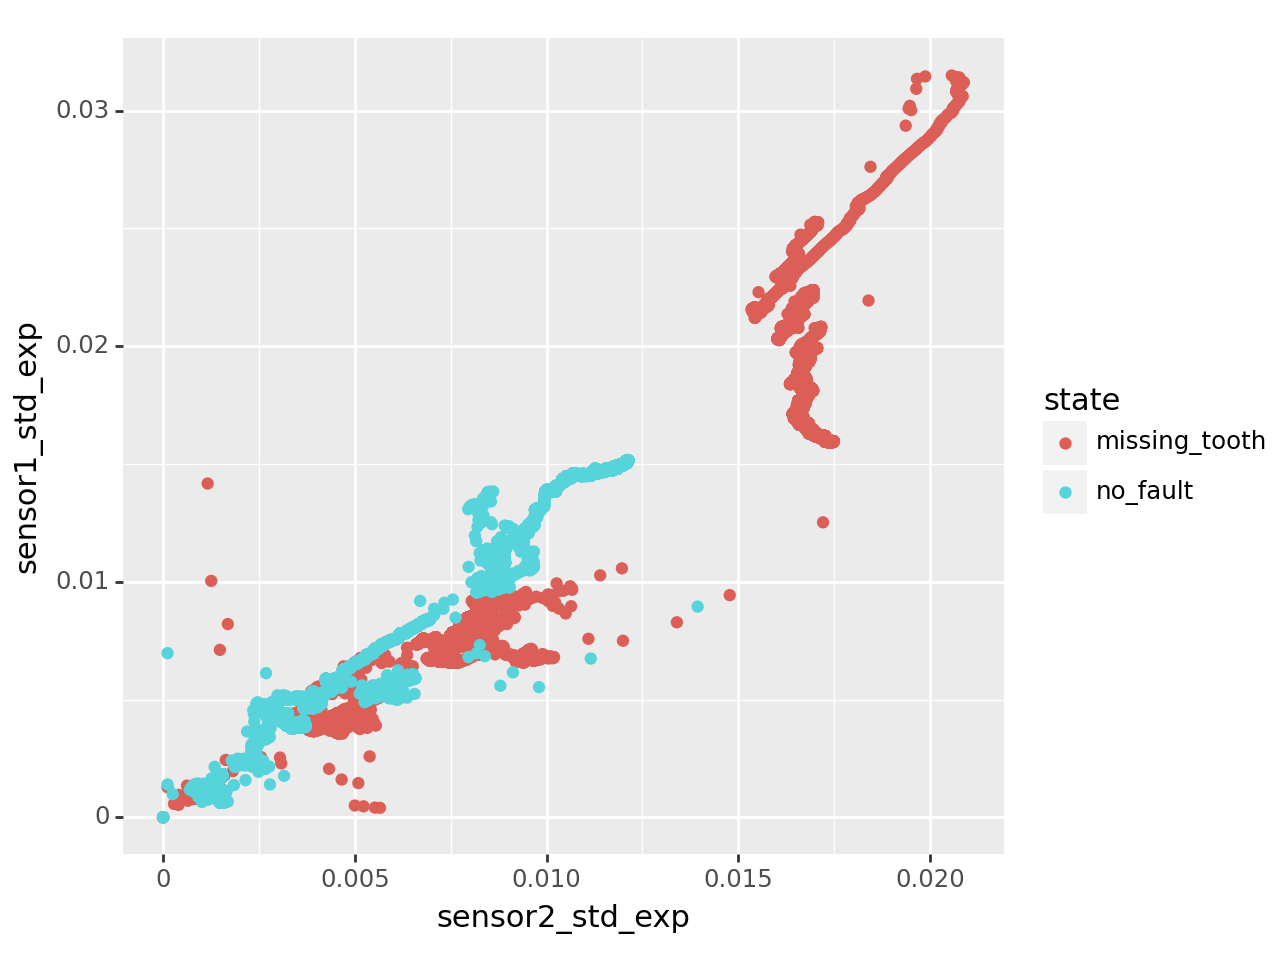

<Figure Size: (640 x 480)>

"\ndisplay(ggplot(data = df[df.state.isin(['no_fault', 'tooth_chipped'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))\ndisplay(ggplot(data = df[df.state.isin(['no_fault', 'surface_fault'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))\ndisplay(ggplot(data = df[df.state.isin(['no_fault', 'root_crack'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))\ndisplay(ggplot(data = df[df.state.isin(['no_fault', 'eccentricity'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))\n"

In [27]:
"""
# Create the graph above only with no_fault vs other states
display(ggplot(data = df[df.state.isin(['no_fault', 'missing_tooth'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))
display(ggplot(data = df[df.state.isin(['no_fault', 'tooth_chipped'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))
display(ggplot(data = df[df.state.isin(['no_fault', 'surface_fault'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))
display(ggplot(data = df[df.state.isin(['no_fault', 'root_crack'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))
display(ggplot(data = df[df.state.isin(['no_fault', 'eccentricity'])], mapping = aes(x = 'sensor2_std_exp', y = 'sensor1_std_exp')) + geom_point(aes(color = 'state')))
"""

In [28]:
# Create a formated column of state as Expected: [0 1 2 3 4 5] input
display(df.state.unique())
df['state_expected'] = df.state.apply(lambda x: ['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault', 'root_crack', 'eccentricity'].index(x))
# Create a df dataset that excludes time_x, gear_fault_desc, state, time_formatted
df_edit = df[['sensor1', 'sensor2', 'sensor1_max_exp', 'sensor1_min_exp', 'sensor1_mean_exp', 'sensor1_std_exp', 
        'sensor2_max_exp', 'sensor2_min_exp', 'sensor2_mean_exp', 'sensor2_std_exp', 'speedSet', 'load_value', 'state_expected', 'time_normalized']]
display(df.state_expected.unique())


array(['missing_tooth', 'tooth_chipped', 'surface_fault', 'no_fault',
       'root_crack', 'eccentricity'], dtype=object)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [29]:
df_edit.head()

,sensor1,sensor2,sensor1_max_exp,sensor1_min_exp,sensor1_mean_exp,sensor1_std_exp,sensor2_max_exp,sensor2_min_exp,sensor2_mean_exp,sensor2_std_exp,speedSet,load_value,state_expected,time_normalized
0,2.520016,2.430496,2.520016,2.520016,2.520016,0.000000,2.430496,2.430496,2.430496,0.000000,8.332031,0,0,0.0000
1,2.521822,2.430660,2.521822,2.520016,2.520919,0.001278,2.430660,2.430496,2.430578,0.000116,8.332031,0,0,0.0002
2,2.519194,2.429511,2.521822,2.519194,2.520344,0.001344,2.430660,2.429511,2.430222,0.000622,8.332031,0,0,0.0004
3,2.519851,2.428853,2.521822,2.519194,2.520221,0.001125,2.430660,2.428853,2.429880,0.000852,8.332031,0,0,0.0006
4,2.518701,2.429346,2.521822,2.518701,2.519917,0.001188,2.430660,2.428853,2.429773,0.000776,8.332031,0,0,0.0008


In [35]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

print(df_edit.state_expected.unique())
# Create a Lightgbm model for classification using the df dataset print the accuracy of the model
X = df_edit[['sensor1', 'sensor2', 'speedSet', 'load_value', 'time_normalized']]
y = df_edit['state_expected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.01, stratify=y_train)
# Merge x and y to one dataframe
X_train['state'] = y_train
X_test['state'] = y_test
X_val['state'] = y_val

X_train['sensor1_mx_exp'] = X_train.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().max())
X_train['sensor2_max_exp'] = X_train.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().max())
X_train['sensor1_min_exp'] = X_train.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().min())
X_train['sensor2_min_exp'] = X_train.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().min())
X_train['sensor1_mean_exp'] = X_train.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().mean())
X_train['sensor2_mean_exp'] = X_train.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().mean())
X_train['sensor1_std_exp'] = X_train.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().std())
X_train['sensor2_std_exp'] = X_train.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().std())

X_test['sensor1_mx_exp'] = X_test.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().max())
X_test['sensor2_max_exp'] = X_test.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().max())
X_test['sensor1_min_exp'] = X_test.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().min())
X_test['sensor2_min_exp'] = X_test.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().min())
X_test['sensor1_mean_exp'] = X_test.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().mean())
X_test['sensor2_mean_exp'] = X_test.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().mean())
X_test['sensor1_std_exp'] = X_test.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().std())
X_test['sensor2_std_exp'] = X_test.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().std())

X_val['sensor1_mx_exp'] = X_val.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().max())
X_val['sensor2_max_exp'] = X_val.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().max())
X_val['sensor1_min_exp'] = X_val.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().min())
X_val['sensor2_min_exp'] = X_val.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().min())
X_val['sensor1_mean_exp'] = X_val.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().mean())
X_val['sensor2_mean_exp'] = X_val.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().mean())
X_val['sensor1_std_exp'] = X_val.groupby(['state', 'load_value', 'speedSet']).sensor1.transform(lambda x: x.expanding().std())
X_val['sensor2_std_exp'] = X_val.groupby(['state', 'load_value', 'speedSet']).sensor2.transform(lambda x: x.expanding().std())

# Order datasets by time_normalized then y datasets = state and drop column state
X_train = X_train.sort_values('time_normalized')
X_test = X_test.sort_values('time_normalized')
X_val = X_val.sort_values('time_normalized')
y_train = X_train['state']
y_test = X_test['state']
y_val = X_val['state']
X_train = X_train.drop(columns='state')
X_test = X_test.drop(columns='state')
X_val = X_val.drop(columns='state')

display(X_train)
display(X_test)
# Replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
X_val.fillna(0, inplace=True)
print(y_val.value_counts())
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

log_reg = LogisticRegression(max_iter=100, multi_class='ovr', C=0.1)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[0 1 2 3 4 5]


,sensor1,sensor2,speedSet,load_value,time_normalized,sensor1_mx_exp,sensor2_max_exp,sensor1_min_exp,sensor2_min_exp,sensor1_mean_exp,sensor2_mean_exp,sensor1_std_exp,sensor2_std_exp
0,2.519358,2.429675,8.332031,0,0.0000,2.524286,2.434274,2.516402,2.424747,2.520710,2.429950,0.000947,0.000945
75000,2.517880,2.430003,25.000000,80,0.0000,2.546625,2.459898,2.485850,2.394853,2.520249,2.428631,0.006607,0.006458
25000,2.519194,2.430496,8.332031,80,0.0000,2.527079,2.436409,2.512131,2.421626,2.519961,2.429959,0.001878,0.001803
125000,2.518866,2.442979,40.000000,80,0.0000,2.577012,2.476652,2.457598,2.384340,2.521832,2.431648,0.015254,0.012060
50000,2.524779,2.432796,25.000000,0,0.0000,2.548103,2.452178,2.496363,2.411935,2.521528,2.431317,0.004790,0.004527
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24999,2.519851,2.430989,8.332031,0,4.9998,2.528393,2.434931,2.515581,2.426061,2.521588,2.430586,0.001198,0.001049
124999,2.511803,2.430003,40.000000,0,4.9998,2.551224,2.456120,2.490614,2.404051,2.520996,2.429983,0.005806,0.006265
49999,2.523629,2.430332,8.332031,80,4.9998,2.529214,2.436902,2.513774,2.424747,2.521448,2.430517,0.001819,0.001537
49999,2.520016,2.427539,8.332031,80,4.9998,2.530035,2.435588,2.514102,2.424090,2.520688,2.429871,0.001727,0.001425


,sensor1,sensor2,speedSet,load_value,time_normalized,sensor1_mx_exp,sensor2_max_exp,sensor1_min_exp,sensor2_min_exp,sensor1_mean_exp,sensor2_mean_exp,sensor1_std_exp,sensor2_std_exp
25001,2.520344,2.426882,8.332031,80,0.0002,2.533320,2.441994,2.500141,2.412428,2.518866,2.428353,0.003706,0.003090
1,2.521494,2.430003,8.332031,0,0.0002,2.524615,2.433617,2.517880,2.427539,2.521528,2.430700,0.001126,0.001011
4,2.522479,2.431317,8.332031,0,0.0008,2.524615,2.433617,2.517880,2.427539,2.521555,2.430636,0.001143,0.001000
25005,2.523136,2.431810,8.332031,80,0.0010,2.527900,2.437231,2.518701,2.427704,2.522791,2.432234,0.001472,0.001502
100005,2.531678,2.427704,40.000000,0,0.0010,2.538248,2.448071,2.495377,2.411771,2.521462,2.431670,0.006278,0.005807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2.522972,2.429018,8.332031,80,4.9988,2.524779,2.433453,2.516073,2.426225,2.520527,2.429788,0.001628,0.001402
124994,2.516730,2.428032,40.000000,0,4.9988,2.534963,2.453492,2.471067,2.410128,2.518933,2.427565,0.006880,0.007284
99994,2.523793,2.446757,25.000000,80,4.9988,2.543504,2.470410,2.490942,2.361509,2.518210,2.429403,0.009553,0.010000
149994,2.521001,2.435588,40.000000,80,4.9988,2.559437,2.471396,2.481580,2.389596,2.522517,2.431261,0.012809,0.012415


state
3    1470
5    1470
1    1470
2    1470
4    1470
0    1470
Name: count, dtype: int64


c:\Users\rober\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy:  0.5543333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show confnusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predikované')
plt.ylabel('Aktuálne')
plt.title('Konfúzna matica LogReg')
plt.legend([f'Presnosť: {accuracy:.2f}'])
plt.show()

In [36]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the LightGBM classifier
clf = lgb.LGBMClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2599
[LightGBM] [Info] Number of data points in the train set: 873180, number of used features: 13
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
Accuracy: 0.8351666666666666


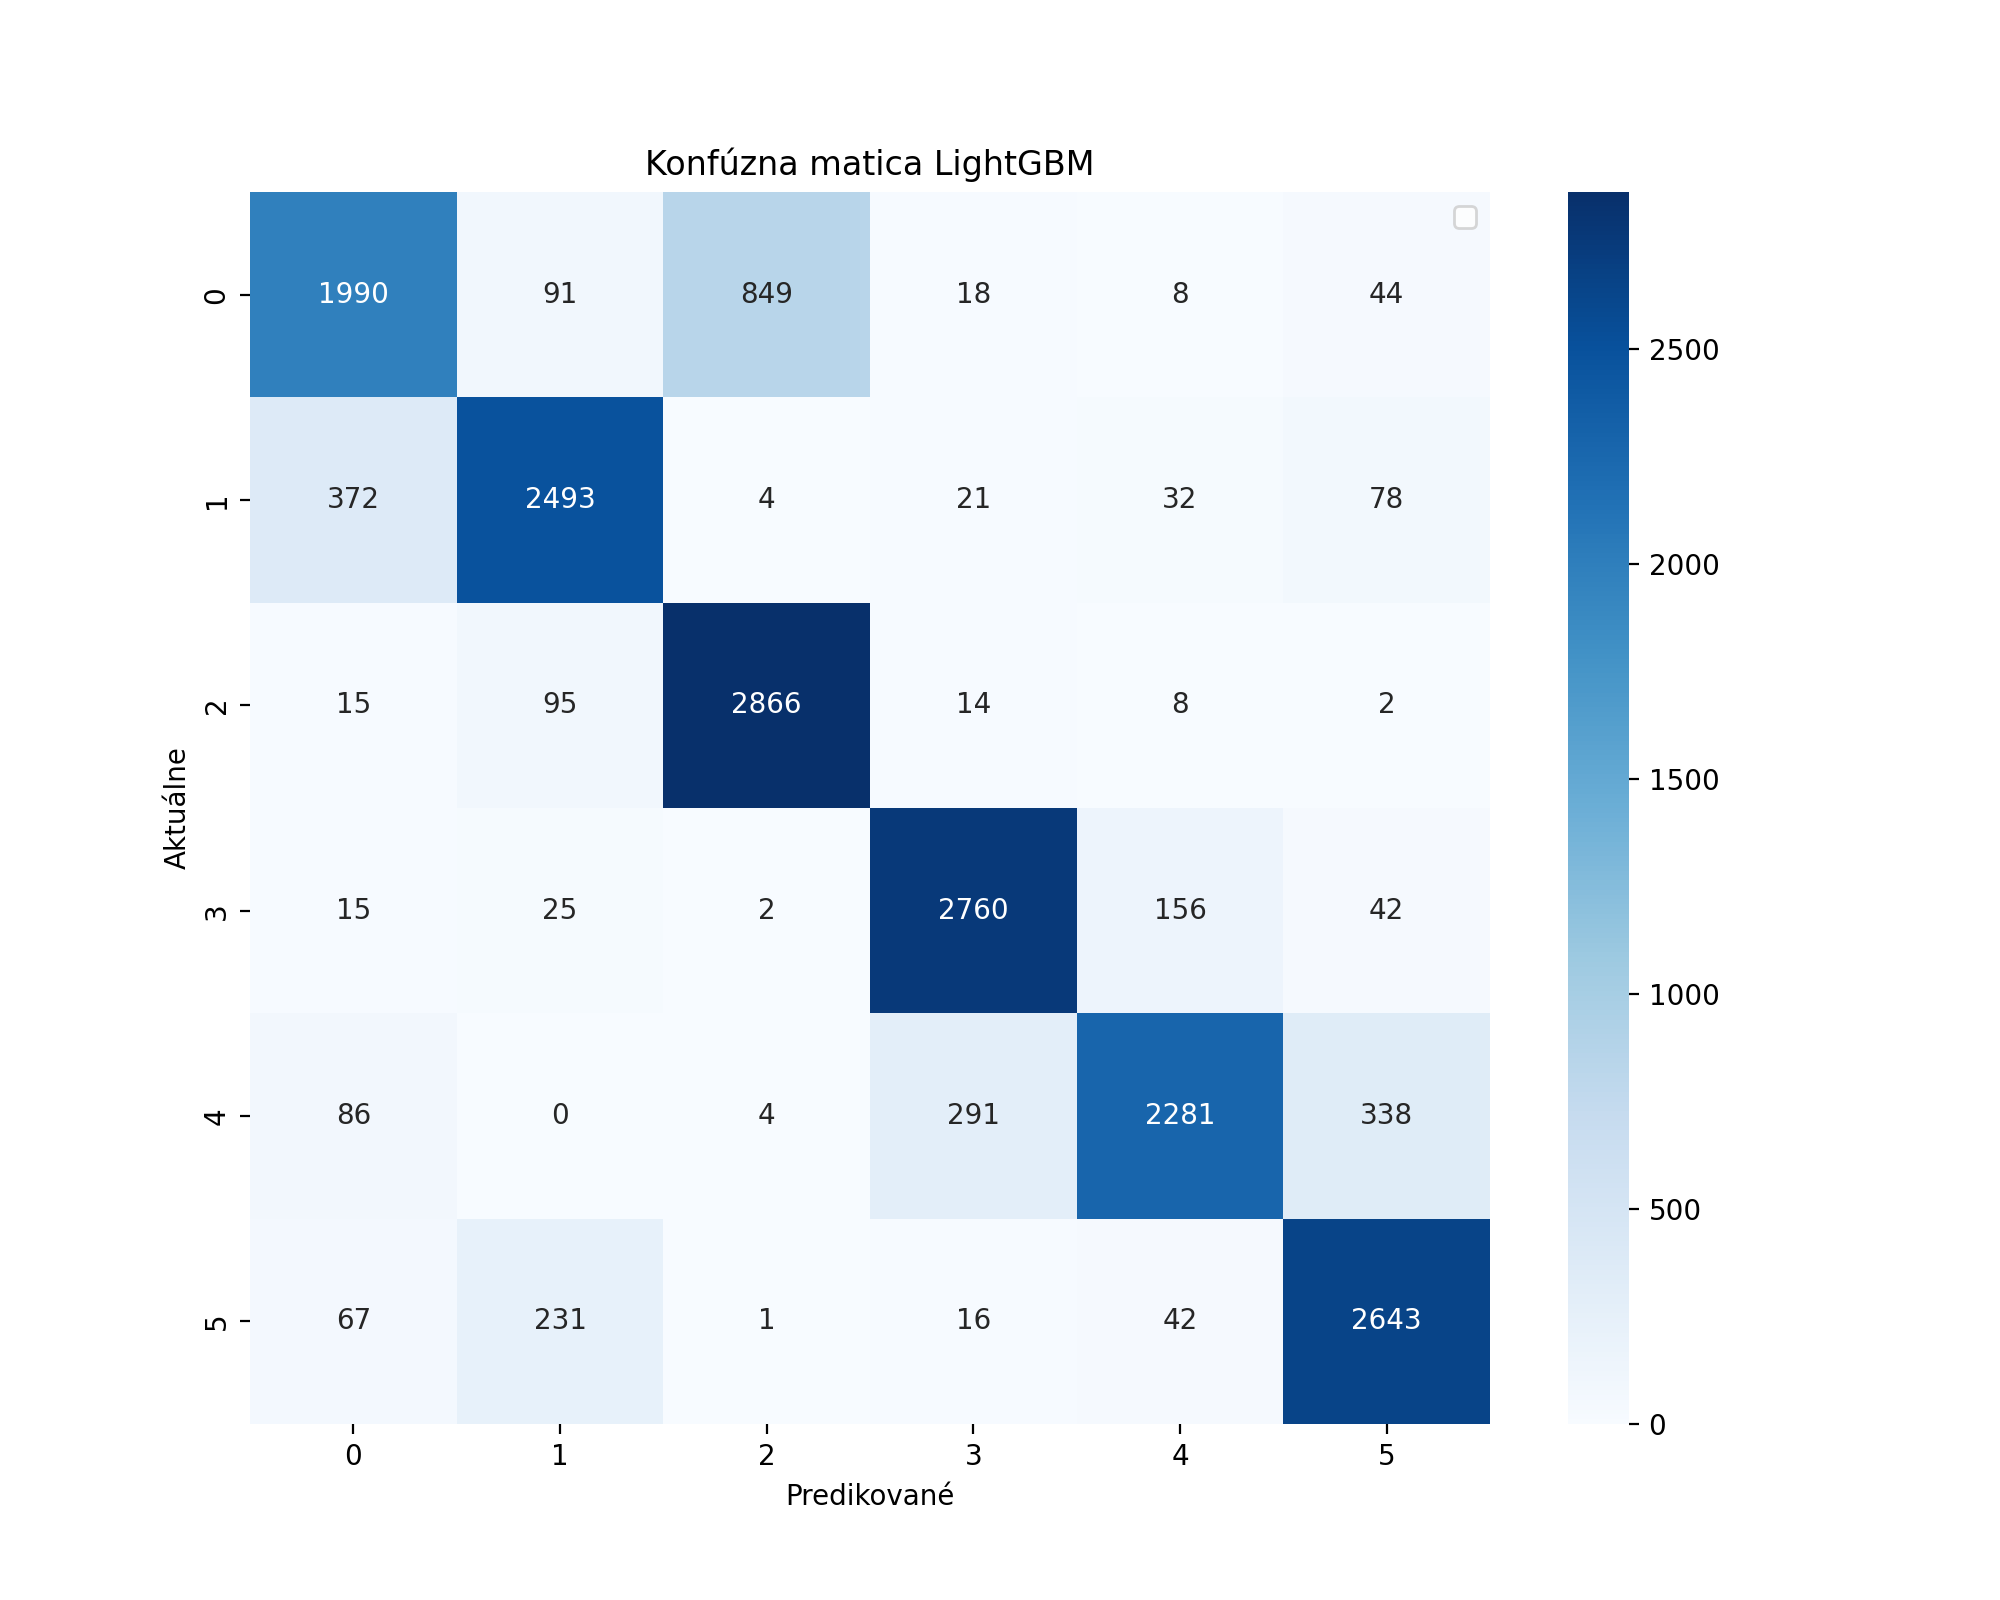

In [37]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show confnusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predikované')
plt.ylabel('Aktuálne')
plt.title('Konfúzna matica LightGBM')
plt.legend([f'Presnosť: {accuracy:.2f}'])
plt.show()



In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create a Xgboost model for classification using the df dataset print the accuracy of the model

# Create the XGBoost classifier model
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.807


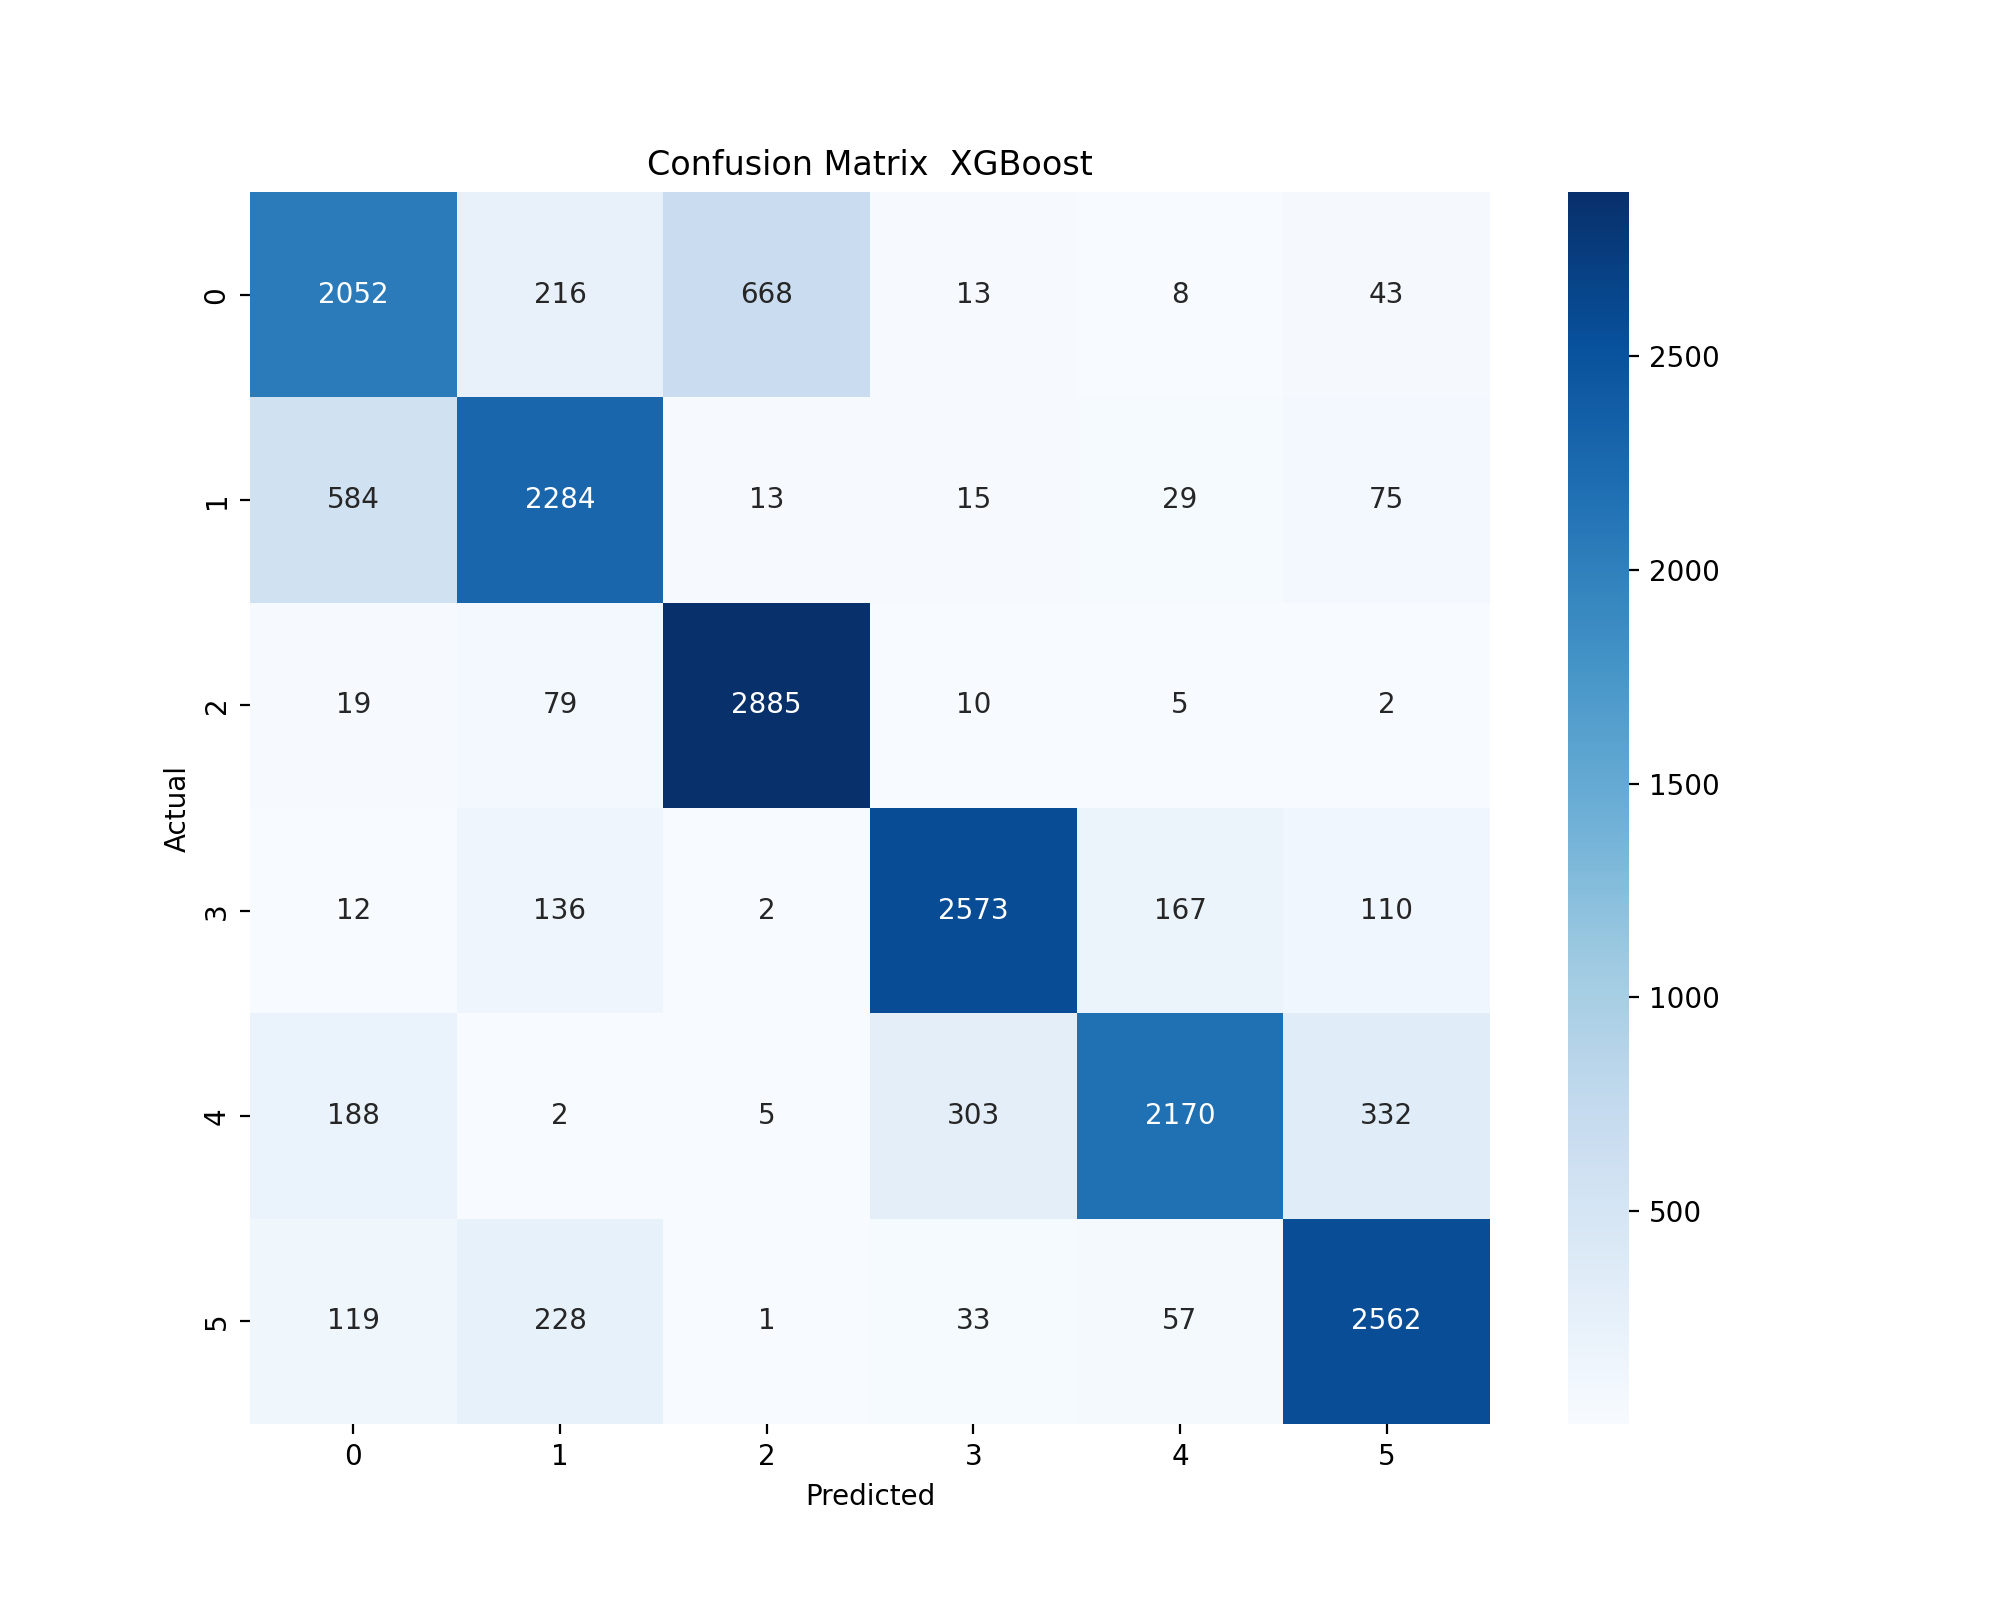

In [39]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show confnusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  XGBoost')
plt.show()




In [40]:
# Create a multilayer perceptron model for classification using the df dataset print the accuracy of the model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the MLP classifier model
model = MLPClassifier(hidden_layer_sizes=(100, 100, 50), max_iter=100)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8542777777777778


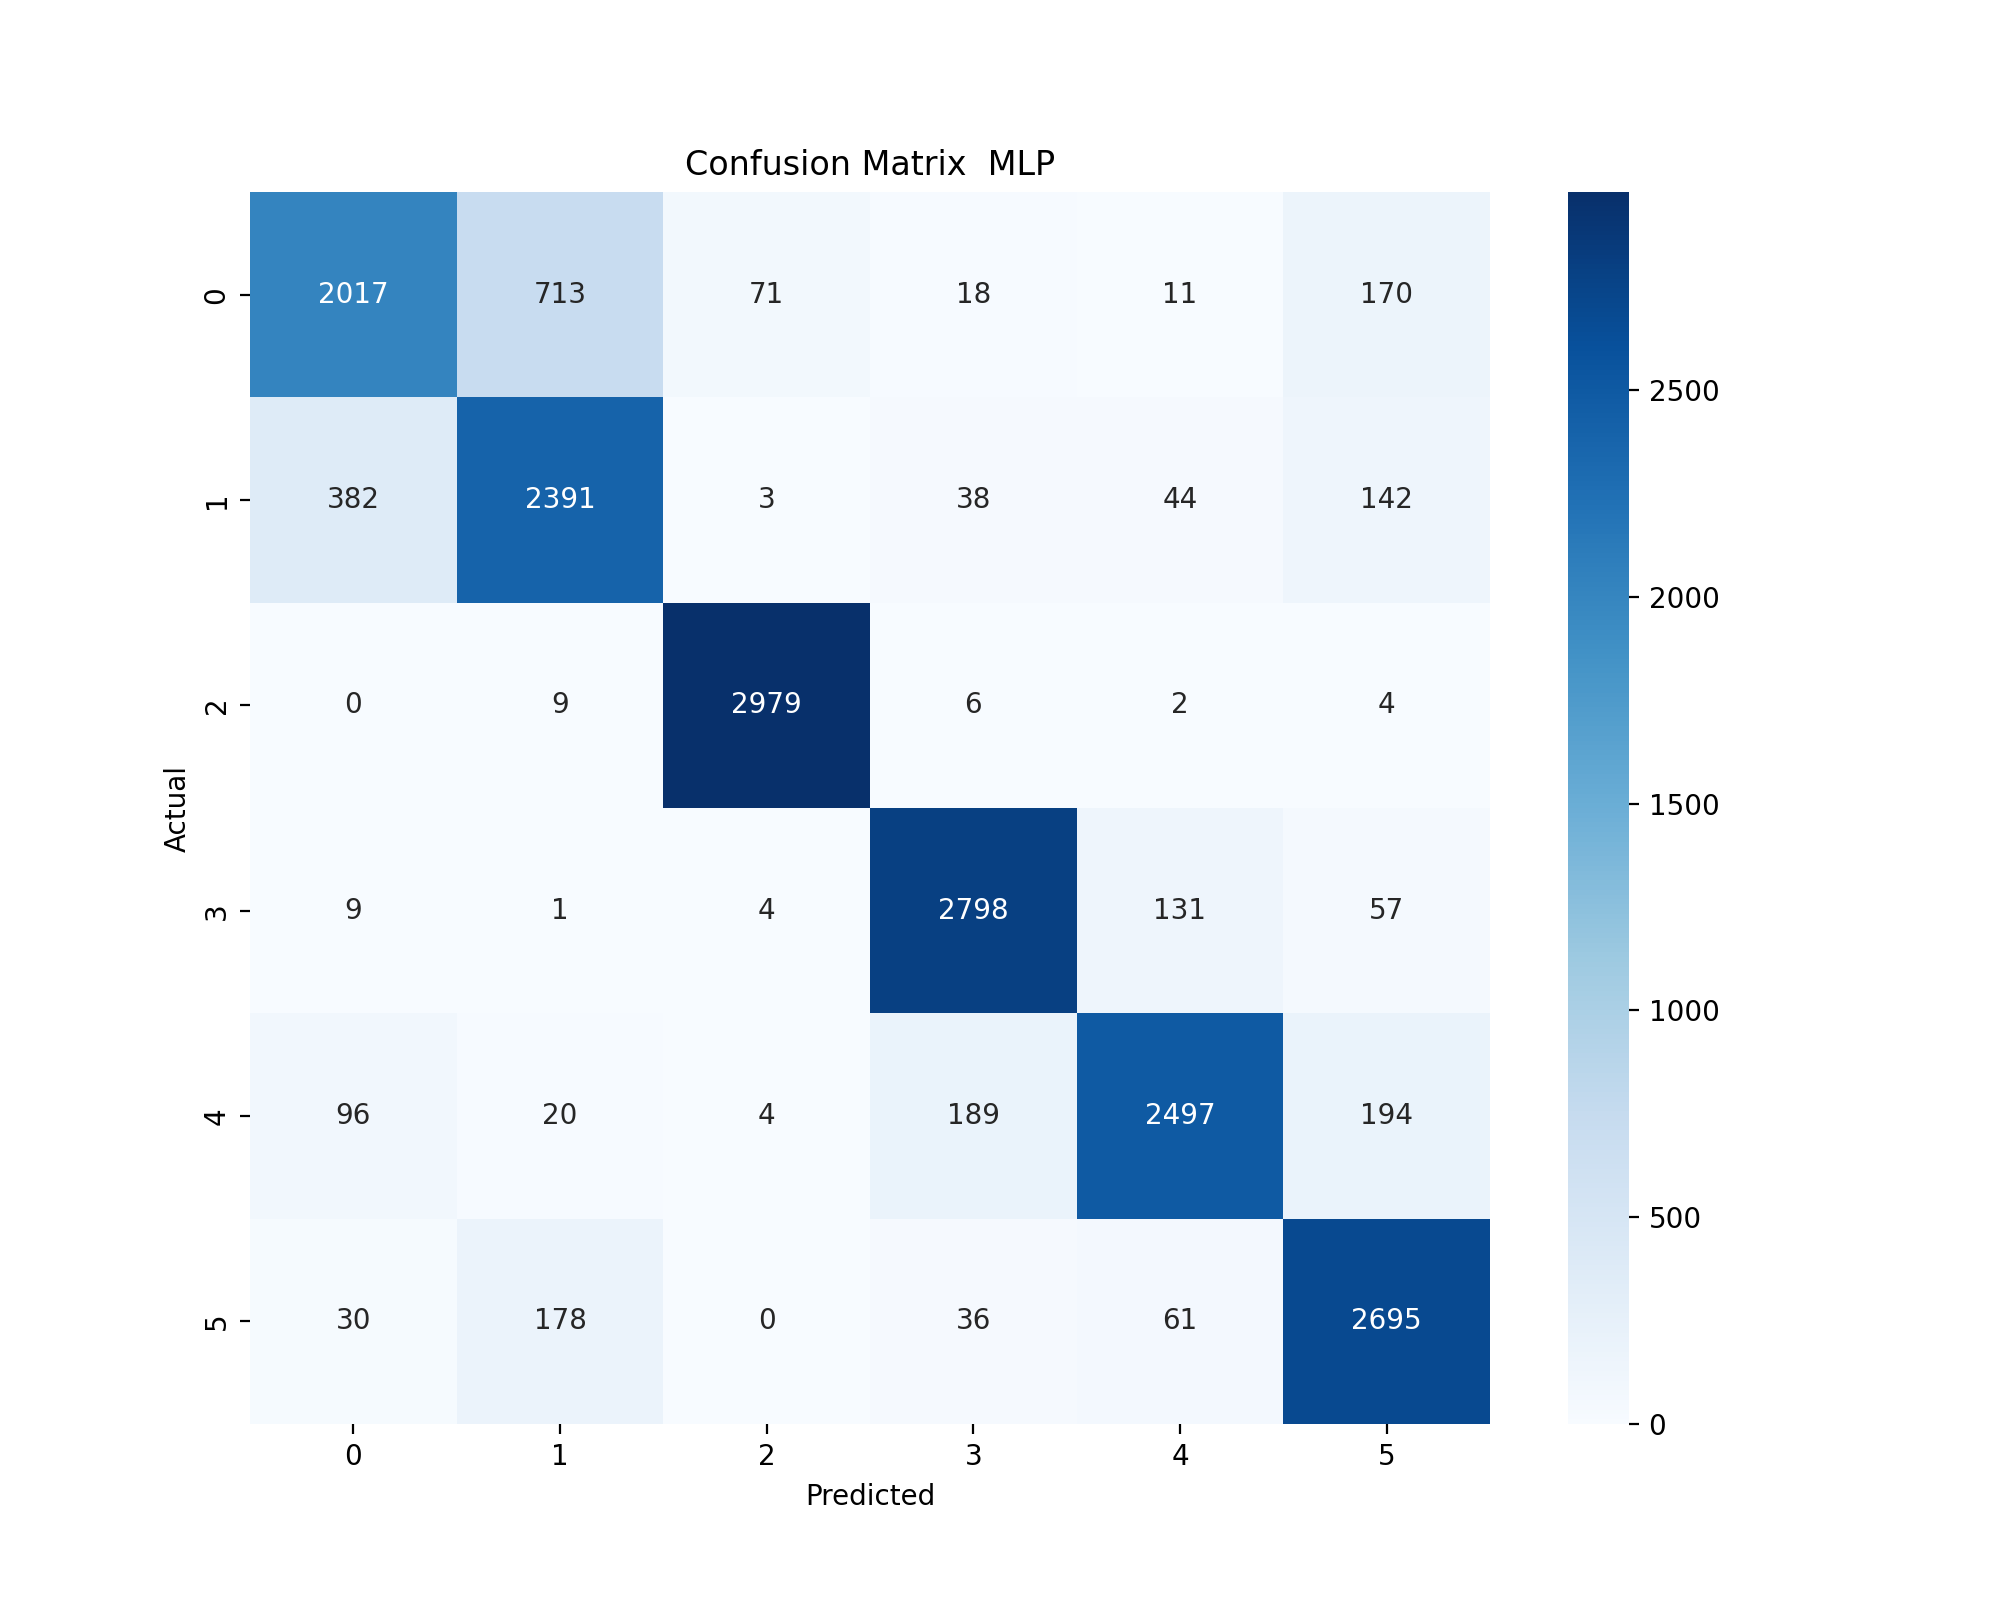

In [41]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show confnusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  MLP')
plt.show()

In [42]:
# Create a KNN model for classification using the df dataset print the accuracy of the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the KNN classifier model
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8922777777777777


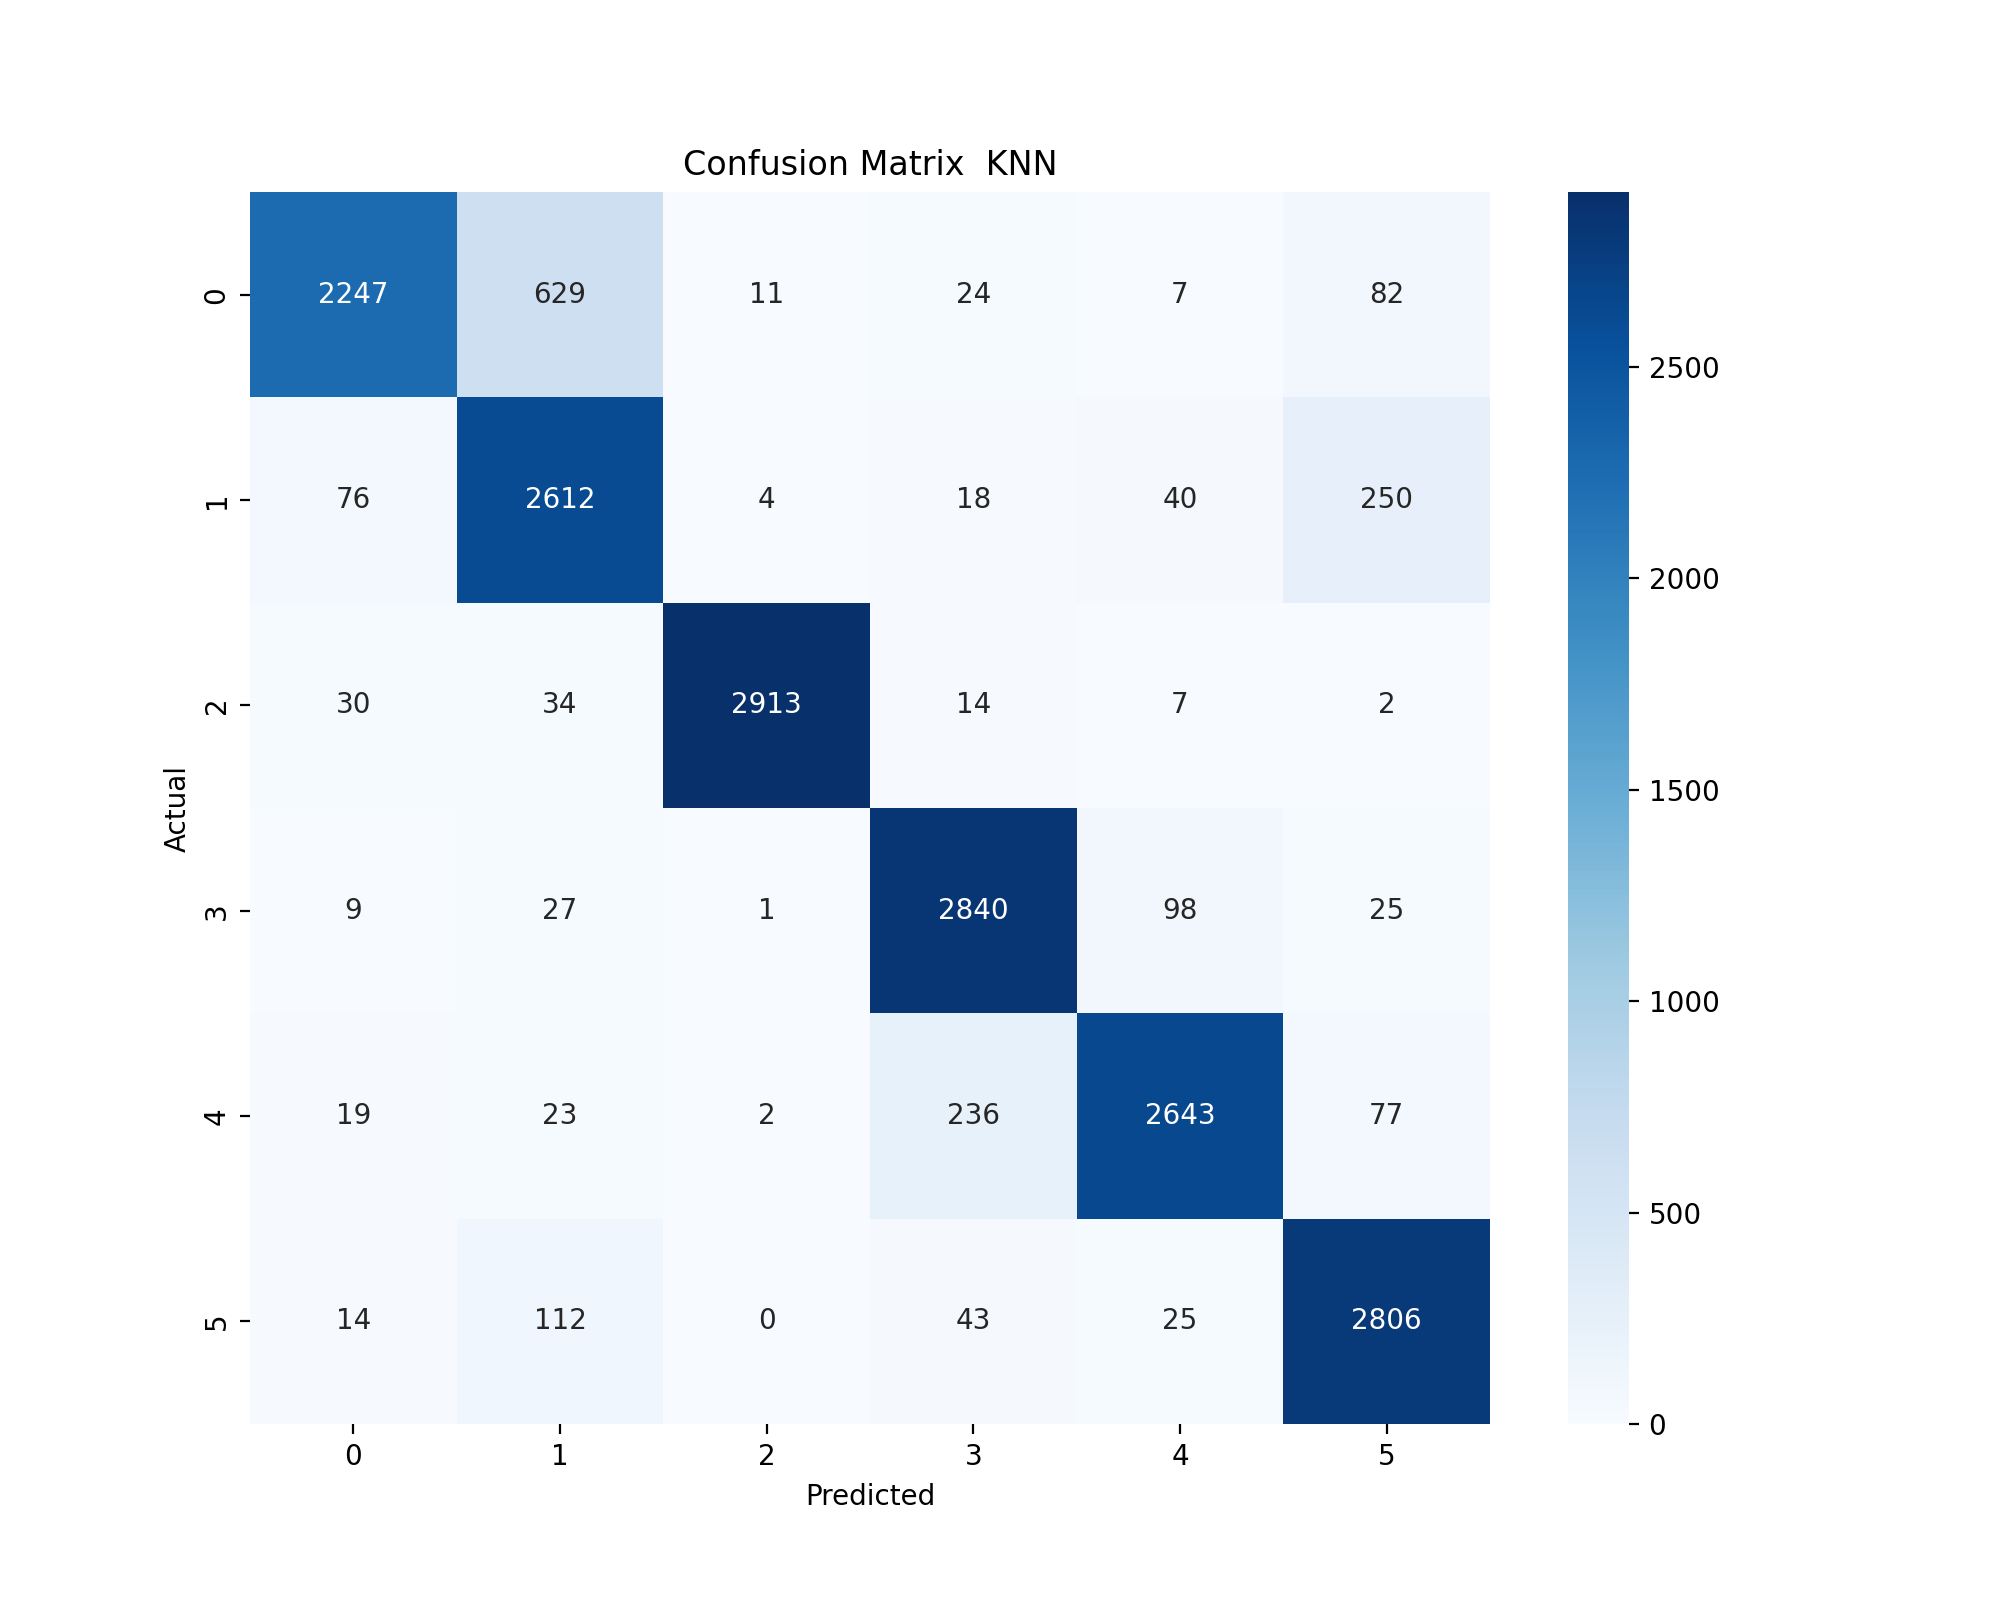

In [43]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show confnusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  KNN')
plt.show()


In [44]:

# Create a Random forest model for classification using the df dataset print the accuracy of the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the Random Forest classifier model
model = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



KeyboardInterrupt: 

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show confnusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest"')
plt.show()

'\n# Calculate the confusion matrix\ncm = confusion_matrix(y_test, y_pred)\n\n# Show confnusion matrix as a heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(cm, annot=True, fmt=\'d\', cmap=\'Blues\', xticklabels=model.classes_, yticklabels=model.classes_)\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'Actual\')\nplt.title(\'Confusion Matrix Random Forest"\')\nplt.show()\n'

In [ ]:
# Create a decision tree model for classification using the df dataset print the accuracy of the model


In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
clf = SVC()

# Fit the classifier to the data
clf.fit(X_train, y_train)

# Print the accuracy of the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

"\nfrom sklearn.svm import SVC\n\n# Create the SVM classifier\nclf = SVC()\n\nX = df[['sensor1', 'sensor2', 'sensor1_max_exp', 'sensor1_min_exp', 'sensor1_mean_exp',\n        'sensor2_max_exp', 'sensor2_min_exp', 'sensor2_mean_exp', 'speedSet', 'load_value']]\ny = df['state']\n\n# Fit the classifier to the data\nclf.fit(X, y)\n\n# Print the accuracy of the classifier\nprint(clf.score(X, y))\n"

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show confnusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()